# **Data Cleaning and Imputation**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
loan_data = pd.read_csv("/content/Loan_Default.csv")

In [ ]:
threshold = 0.5 * len(loan_data)
loan_data_cleaned = loan_data.dropna(thresh=threshold, axis=1)

In [ ]:
numeric_columns = loan_data_cleaned.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = loan_data_cleaned.select_dtypes(include=['object']).columns

In [ ]:
loan_data_cleaned[numeric_columns] = loan_data_cleaned[numeric_columns].fillna(loan_data_cleaned[numeric_columns].median())

In [ ]:
loan_data_cleaned[categorical_columns] = loan_data_cleaned[categorical_columns].apply(lambda x: x.fillna(x.mode()[0]))

In [ ]:
missing_values_cleaned = loan_data_cleaned.isnull().sum()
print(missing_values_cleaned[missing_values_cleaned > 0])

Series([], dtype: int64)


# **Exploratory Data Analysis (EDA)**

In [ ]:
print(loan_data_cleaned.describe())

                 ID     year   loan_amount  rate_of_interest  \
count  54874.000000  54874.0  5.487400e+04      54874.000000   
mean   52326.500000   2019.0  3.313404e+05          4.032015   
std    15840.903673      0.0  1.833748e+05          0.485553   
min    24890.000000   2019.0  2.650000e+04          0.000000   
25%    38608.250000   2019.0  1.965000e+05          3.750000   
50%    52326.500000   2019.0  2.965000e+05          3.990000   
75%    66044.750000   2019.0  4.365000e+05          4.250000   
max    79763.000000   2019.0  3.576500e+06          8.000000   

       Interest_rate_spread  Upfront_charges          term  property_value  \
count          54874.000000     54874.000000  54874.000000    5.487400e+04   
mean               0.425863      3074.672171    335.533495    4.896119e+05   
std                0.444675      2812.653886     57.889198    3.466911e+05   
min               -3.638000         0.000000     96.000000    8.000000e+03   
25%                0.180225      

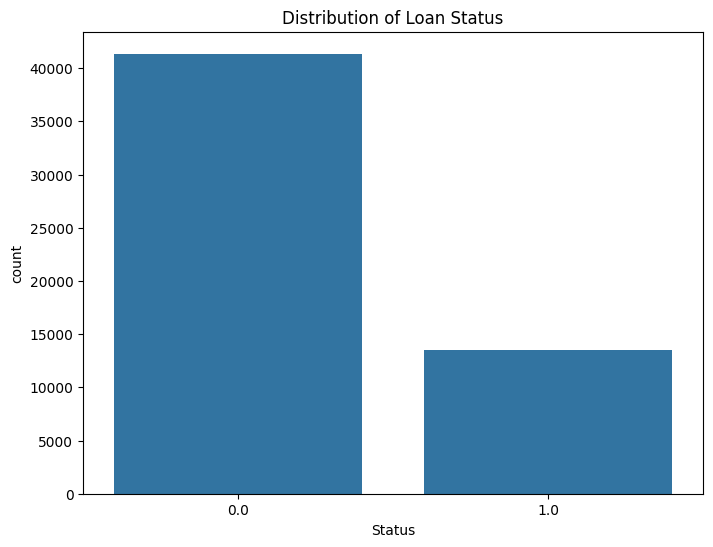

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=loan_data_cleaned, x='Status')
plt.title('Distribution of Loan Status')
plt.show()

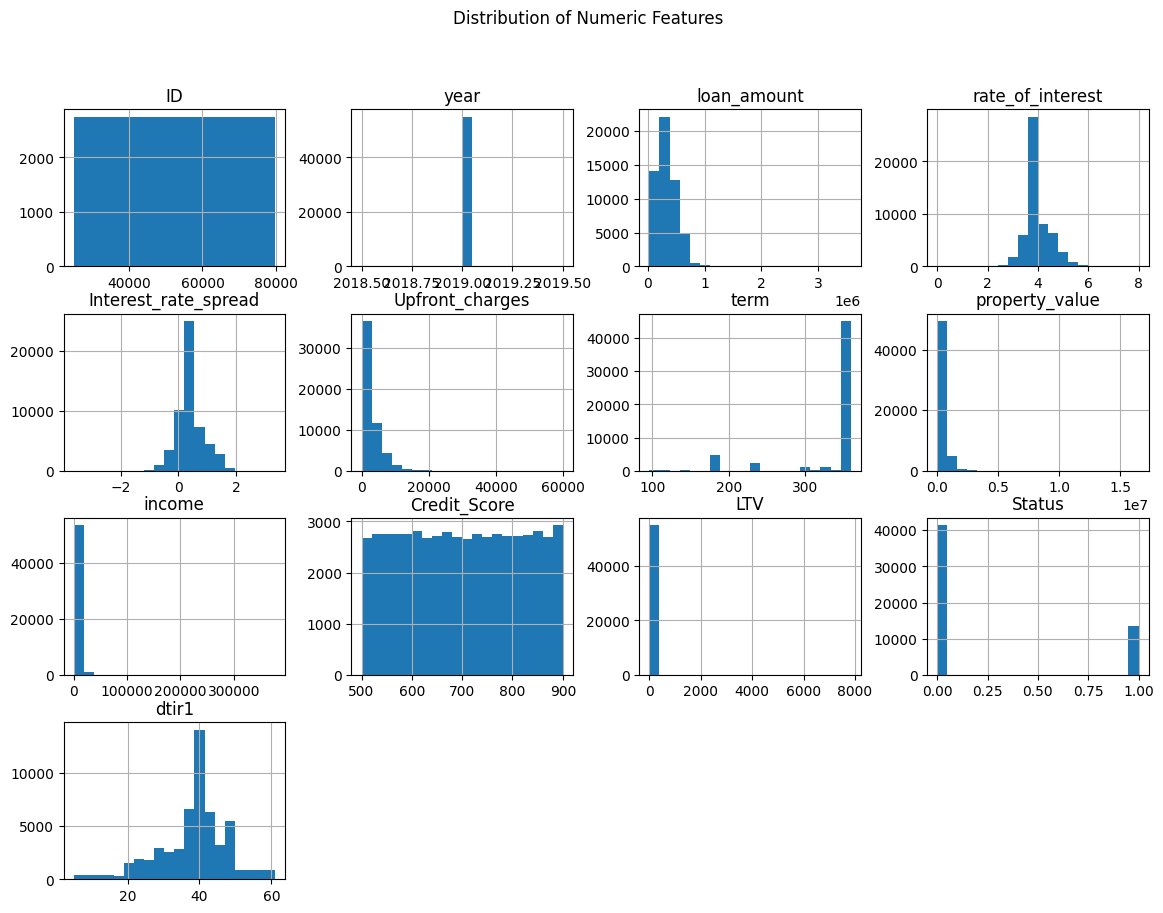

In [ ]:
loan_data_cleaned[numeric_columns].hist(bins=20, figsize=(14, 10))
plt.suptitle('Distribution of Numeric Features')
plt.show()

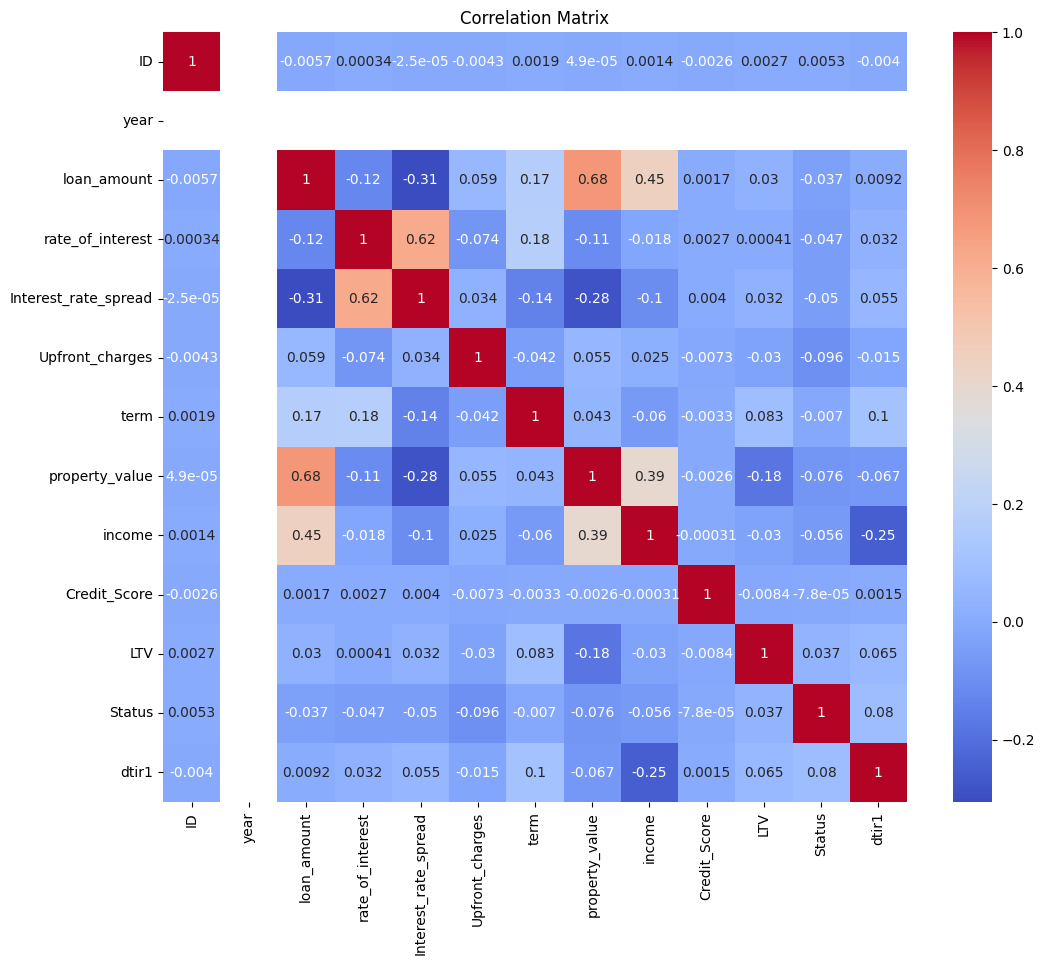

In [ ]:
numeric_data = loan_data_cleaned[numeric_columns]
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# **Visualization**

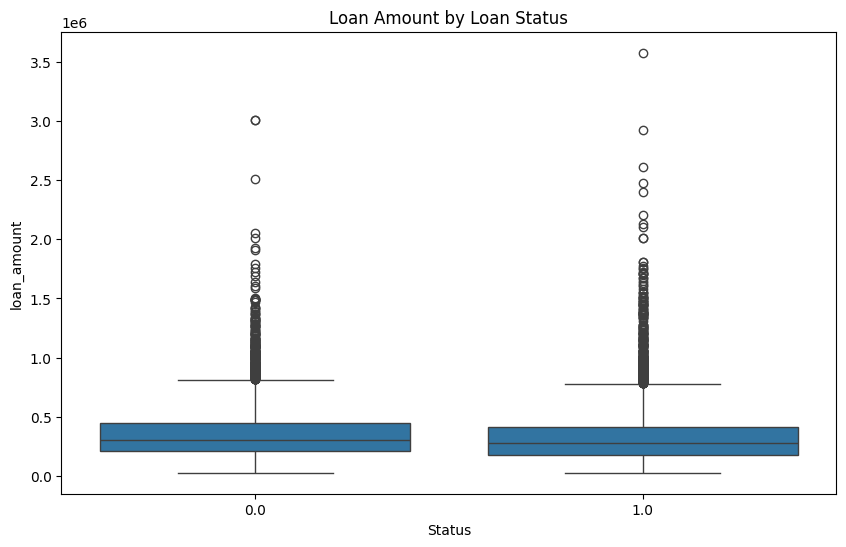

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=loan_data_cleaned, x='Status', y='loan_amount')
plt.title('Loan Amount by Loan Status')
plt.show()

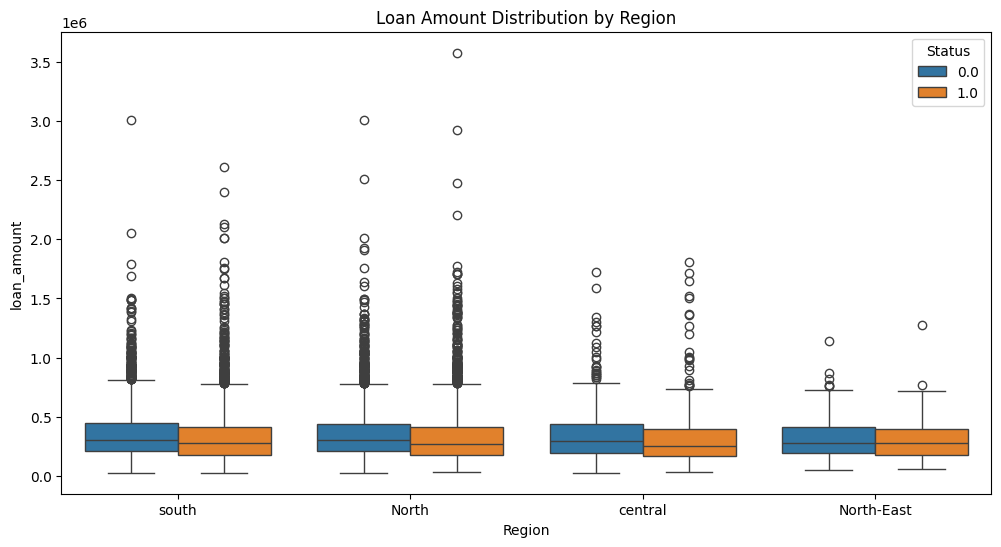

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=loan_data_cleaned, x='Region', y='loan_amount', hue='Status')
plt.title('Loan Amount Distribution by Region')
plt.show()

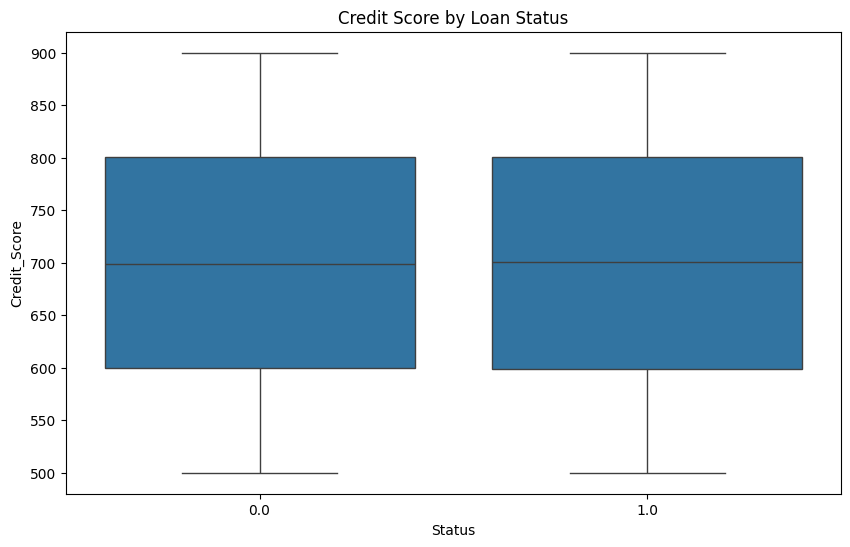

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=loan_data_cleaned, x='Status', y='Credit_Score')
plt.title('Credit Score by Loan Status')
plt.show()